In [1]:
!pip install pygal

In [2]:
!pip install cufflinks

In [3]:
!pip install aif360

In [4]:
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
import json
#Visulaization libraries
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Viridis5
import seaborn as sns
import matplotlib.pyplot as plt
import pygal
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Bias Mitigation libraries
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from IPython.display import Markdown, display
from aif360.algorithms.preprocessing.reweighing import Reweighing
#
from IPython.display import SVG, display
import warnings
warnings.filterwarnings("ignore")
#deployment library
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-14 11:16:09,866 - watson_machine_learning_client.wml_client_error - WARNING - Failure during creation of library.
Reason: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Server': 'nginx', 'Date': 'Thu, 14 May 2020 11:16:09 GMT', 'Content-Type': 'application/json', 'Content-Length': '213', 'Connection': 'keep-alive', 'X-Frame-Options': 'DENY', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1', 'Pragma': 'no-cache', 'Cache-Control': 'private, no-cache, no-store, must-revalidate', 'X-WML-User-Client': 'PythonClient', 'x-global-transaction-id': '602b9p9c9p38reye3fasva4s487f6f7b70e2', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains'})
HTTP response body: {"trace":"6magl5tn19o7","errors":[{"code":"library_already_exists","message":"A library already exists that matches with the provided input - name, version and platform. Provide unique values for these fields."}]}



In [5]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_207a125f0a334cacb91434c6807c7f21 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XjSY-SJCVUyDffj0J_GMcIiZNVzYKnZ5jz3kKSURbYTe',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_207a125f0a334cacb91434c6807c7f21.get_object(Bucket='employeeattrition-donotdelete-pr-fq4h8vdhwoxmzz',Key='HR_Dataset1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.head()

,Age,ManagerReview,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#Get list of columns in the dataset
df_data.columns

Index(['Age', 'ManagerReview', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#Dropping columns (intution)
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
df_data.drop(columns, inplace=True, axis=1)

1. Get description of data

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution,      excluding NaN values.

In [8]:
#To get description of all columns
df_data.describe(include = 'all')

,Age,ManagerReview,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,NaN,882,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,2.721769,NaN,2.729932,2.063946,...,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.024165,1.093082,NaN,0.711561,1.106940,...,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,...,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,2.000000,NaN,2.000000,1.000000,...,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,3.000000,NaN,3.000000,2.000000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,4.000000,NaN,3.000000,3.000000,...,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


2. Data Cleaning
This phase is the most time consuming yet the most importat one. Here, we filter and extract only the information that is needed for problem solving. Quality of the model is highly dependant on the quality of the data that is given as an input.

    Understand meaning of every feature and identify errors.
    
    Look for any missing values and find a way to fill the missing values.
    
    Remove duplicate or corrupted records.
    
    Scaling and normalization of data.
    
    Character encoding (string to numerical representation).
    
    Handle inconsistent entry.
    
    Use tools like pandas(python), dplyr(R), numpy.

In [9]:
#Find number of missing values in every feature
df_data.isnull().sum()

Age                        0
ManagerReview              0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [10]:
#Columns with string values
categorical_column = ['ManagerReview', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [11]:
#Deep copy the original data
data_encoded = df_data.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df_data[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature ManagerReview
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Brand Representative': 0, 'Human Resources': 1, 'Manager': 2, 'Marketing Director': 3, 'Research Director': 4, 'Research Scientist': 5, 'Sales Executive': 6, 'Sales Representative': 7, 'Technician': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [12]:
data_encoded.head()

,Age,ManagerReview,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,2,0,3,2,...,11,3,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,3,1,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,1,2,1,...,15,3,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,4,0,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,1,1,3,1,...,12,3,1,6,3,3,2,2,2,2


3. Get data distribution between output classes

In [13]:
data_encoded['ManagerReview'].value_counts()

0    1233
1     237
Name: ManagerReview, dtype: int64

From the above info, we see that about 82 percent of employees leave positive reviews, others are negative for managers

In [14]:
data_correlation = data_encoded.corr()

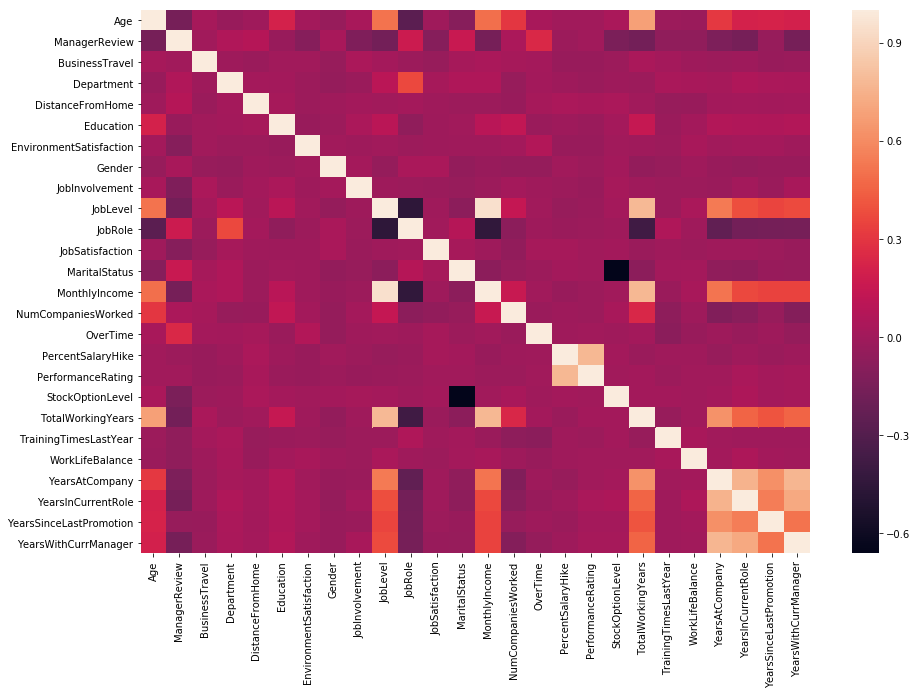

In [15]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

Analysis of correlation results (sample analysis)

1. Monthly income is highly correlated with Job level.

2. Job level is highly correlated with total working hours.

3. Monthly income is highly correlated with total working hours.

4. Age is also positively correlated with the Total working hours.

5. Marital status and stock option level are negatively correlated

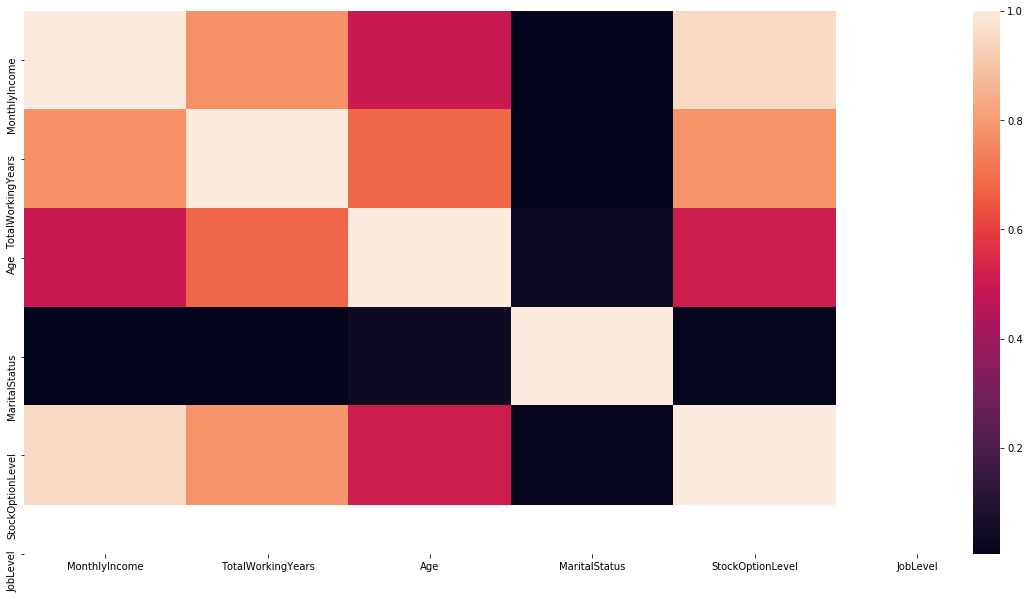

In [16]:
#Viewing the analysis obtained above 
data_corr_filtered = df_data[['MonthlyIncome', 'TotalWorkingYears', 'Age', 'MaritalStatus', 'StockOptionLevel',
                      'JobLevel']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

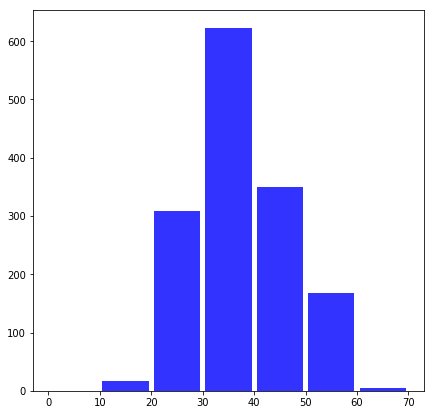

In [17]:
#Plot to see distribution of age overall
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

In [18]:
#We are going to bin age (multiples of 10) to see which age group are likely to post positive or negative scores for managers.
#Before that, let us take only employee who are likely leave negative reviews for managers.
positive_ManagerReview_df = data_encoded.loc[data_encoded['ManagerReview'] == 1]
negative_ManagerReview_df = data_encoded.loc[data_encoded['ManagerReview'] == 0]

(array([ 0., 10., 81., 89., 34., 23.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

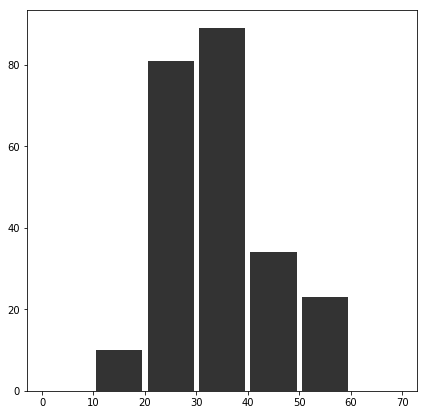

In [19]:
plt.hist(positive_ManagerReview_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='black')

Findings based on above plot
1. Employees in the range of 30 to 40 are more likely leave bad reviews.
2. Employees in the range of 20 to 30 are also likely to leave a bad review.

Business Travel

There are 3 categories in this:

1. No travel (0).

2. Travel Frequently (1).

3. Travel Rarely (2).

Attrition: No = 0 and Yes = 1

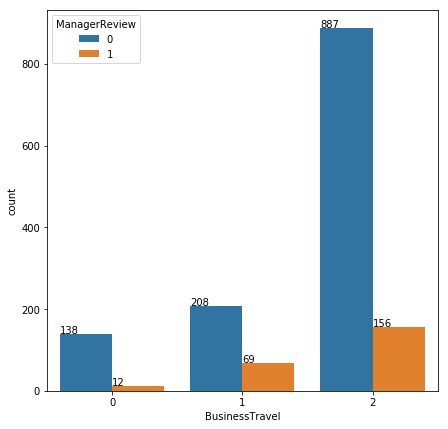

In [20]:
ax = sns.countplot(x="BusinessTravel", hue="ManagerReview", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Results

1. Travel doesn't seem to be a factor in whether an employee leaves a bad review or not. Traveling rarely has the highest number of employees do it at 156. Percentage wise travel frequently has about a 25 percent negative review rate.

There are three categories in department:

   1. Human Resources: 0
   2. Research & Development: 1
   3. Sales: 2
    
Attrition: No = 0 and Yes = 1

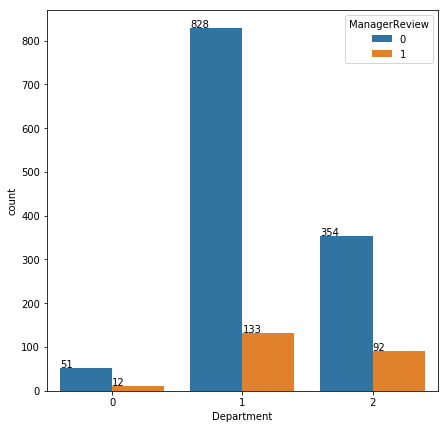

In [21]:
ax = sns.countplot(x="Department", hue="ManagerReview", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Results

1. 56% of employess from research and development department are likely to leave a bad review.
2. 38% of employees from sales department are likely to leave a bad review.

Distance from home Vs Employee Attrition

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

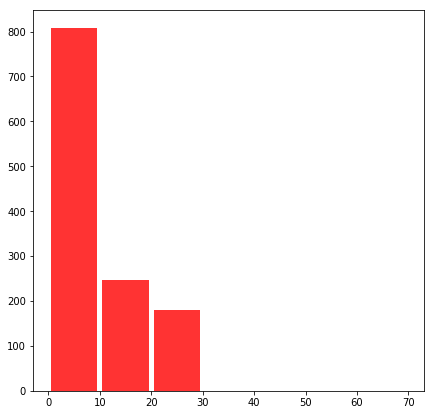

In [22]:
plt.hist(negative_ManagerReview_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

(array([133.,  55.,  49.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

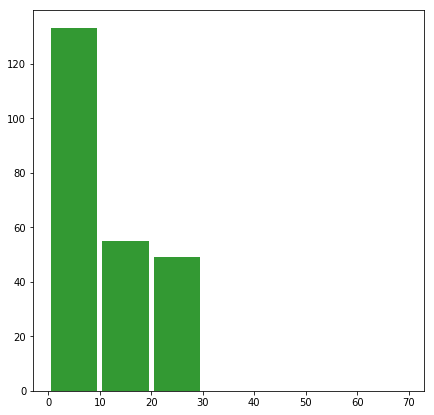

In [23]:
plt.hist(positive_ManagerReview_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='green')

Results

People who live closeby (0-10 miles) are likely to quit more based on the data


Education vs Negative Reviews
There are five categories:

 1. Below College - 1 
 2. College - 2
 3. Bachelor - 3
 4. Master - 4
 5. Doctor - 5

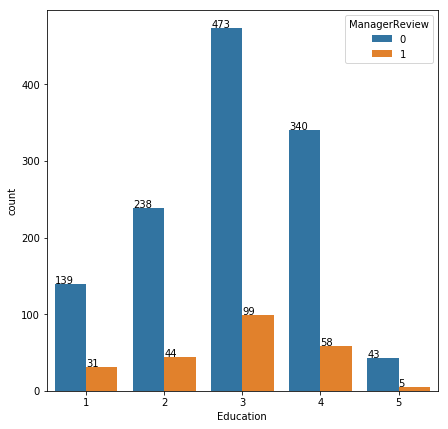

In [24]:
ax = sns.countplot(x="Education", hue="ManagerReview", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Inference:

1. 41% of employees having bachelor's degree are likely to leave a bad review.
2. 24% of employees having master's are the next in line to leave a bad review.

Job Role Vs Manager Review

Categories in job role:

Healthcare Representative : 0
    
Human Resources : 1
    
Laboratory Technician : 2
    
Manager : 3
    
Manufacturing Director : 4
    
Research Director : 5
    
Research Scientist : 6
    
Sales Executive : 7
    
Sales Representative : 8

In [25]:
df_jrole = pd.DataFrame({'count': data_encoded.groupby(["JobRole", "ManagerReview"]).size()}).reset_index()

In [26]:
#Considering attrition case
df_jrole_1 = df_jrole.loc[df_jrole['ManagerReview'] == 1]

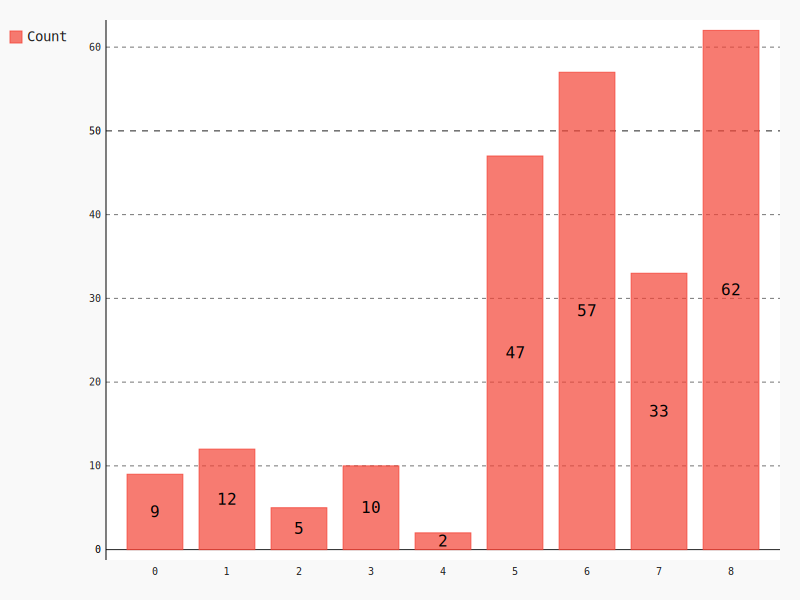

In [27]:
import pygal
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(0,9))
chart.add('Count', df_jrole_1['count'])
#chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))

Findings:
    
Top three roles leaving negative reviews 

26% of employees who are likely to quit belong to Technician group

24% of employees belong to Sales Executive group

19% of employees belong to Research Scientist group

Marital Status vs Manager Review

Categories:

1. 'Divorced': 0

2. 'Married' : 1

3. 'Single'  : 2

In [28]:
#analyzing employees who has positive attrition
init_notebook_mode(connected=True)
cf.go_offline()
positive_ManagerReview_df['MaritalStatus'].value_counts().iplot(kind='bar')

Findings:
    
Nearly 50 % of the employees who are single are likely to quit

Monthly Income vs Manager Review

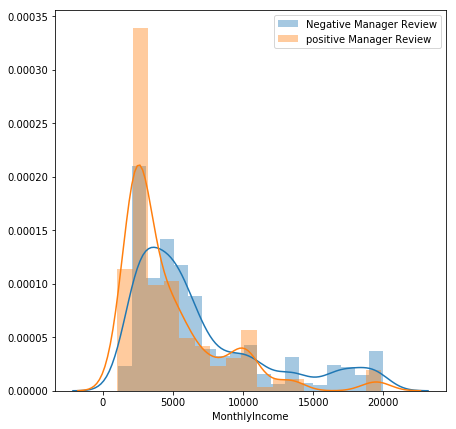

In [29]:
sns.distplot(negative_ManagerReview_df['MonthlyIncome'], label='Negative Manager Review')
sns.distplot(positive_ManagerReview_df['MonthlyIncome'], label='positive Manager Review')
plt.legend()

Findings:
    
It looks like people who are paid less are less likely to leave the company.

Model Development

Extracting label from input data

In [30]:
input_data = data_encoded.drop(['ManagerReview'], axis=1)

In [31]:
input_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,2,0,3,2,6,...,11,3,0,8,0,1,6,4,0,5
1,49,1,1,8,1,3,1,2,2,5,...,23,4,1,10,3,3,10,7,1,7
2,37,2,1,2,2,4,1,2,1,8,...,15,3,0,7,3,3,0,0,0,0
3,33,1,1,3,4,4,0,3,1,5,...,11,3,0,8,3,3,8,7,3,0
4,27,2,1,2,1,1,1,3,1,8,...,12,3,1,6,3,3,2,2,2,2


In [32]:
target_data = data_encoded[['ManagerReview']]

In [33]:
target_data.head()

,ManagerReview
0,1
1,0
2,1
3,0
4,0


In [34]:
len(input_data.columns)

25

Feature Selection

In [35]:
input_data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
col_values = list(input_data.columns.values)

In [37]:
#gives top 10 features having maximum mutual information value
feature_scores = mutual_info_classif(input_data, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

MonthlyIncome 0.03467794373118038
OverTime 0.03161674257128877
Age 0.0273395112893986
JobRole 0.02666682541149834
MaritalStatus 0.021742815129764947
JobLevel 0.02097721981054601
WorkLifeBalance 0.01841327649386071
TotalWorkingYears 0.01823200187203544
JobInvolvement 0.015016626492141194
YearsWithCurrManager 0.014878309748851626


chi-square

In [38]:
#gives top 10 features having maximum chi-square value
feature_scores = chi2(input_data, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

MonthlyIncome 127922.29369381821
TotalWorkingYears 230.72161773754925
YearsAtCompany 142.10005430324915
YearsInCurrentRole 117.5225958913567
YearsWithCurrManager 110.6715338985734
Age 84.15527681001525
OverTime 63.84506671452294
DistanceFromHome 63.77214163101213
JobRole 51.72130983521353
StockOptionLevel 25.26882603175403


In [39]:
df_data.shape

(1470, 26)

In [40]:
#column selection based on feature selection 
data_selected = df_data[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender', 'ManagerReview']]

In [41]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,ManagerReview
0,5993,8,6,4,5,41,Yes,1,0,2,Sales Executive,1,Female,Yes
1,5130,10,10,7,7,49,No,8,1,2,Research Scientist,3,Male,No
2,2090,7,0,0,0,37,Yes,2,0,1,Technician,3,Male,Yes
3,2909,8,8,7,0,33,Yes,3,0,1,Research Scientist,3,Female,No
4,3468,6,2,2,2,27,No,2,1,1,Technician,3,Male,No


In [42]:
len(data_selected.columns)

14

In [43]:
data_selected.shape

(1470, 14)

In [44]:
#encoding labels
data_selected.loc[data_selected.ManagerReview == 'No', 'ManagerReview'] = 0
data_selected.loc[data_selected.ManagerReview == 'Yes', 'ManagerReview'] = 1

In [45]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,ManagerReview
0,5993,8,6,4,5,41,Yes,1,0,2,Sales Executive,1,Female,1
1,5130,10,10,7,7,49,No,8,1,2,Research Scientist,3,Male,0
2,2090,7,0,0,0,37,Yes,2,0,1,Technician,3,Male,1
3,2909,8,8,7,0,33,Yes,3,0,1,Research Scientist,3,Female,0
4,3468,6,2,2,2,27,No,2,1,1,Technician,3,Male,0


In [46]:
input_data = data_selected.drop(['ManagerReview'], axis=1)
target_data = data_selected[['ManagerReview']]

In [47]:
data_selected.shape

(1470, 14)

Get Train, Validation and test data

In [48]:
input_data = data_selected[0:1269]
print('Shape of the input data is ', input_data.shape)
input_data['ManagerReview'].value_counts()

Shape of the input data is  (1269, 14)


0    1061
1     208
Name: ManagerReview, dtype: int64

In [49]:
validation_data = data_selected[1269:1469]
print('Shape of the validation data is ', validation_data.shape)
validation_input_data = validation_data.drop(['ManagerReview'], axis=1)
print('Shape of the validation input data is ', validation_input_data.shape)
validation_target_data = validation_data[['ManagerReview']]
print('Shape of the validation target data is ', validation_target_data.shape)

Shape of the validation data is  (200, 14)
Shape of the validation input data is  (200, 13)
Shape of the validation target data is  (200, 1)


In [50]:
#Using 1 sample as test data to check deployment
test_data = data_selected[1469:]
print(test_data)
print('Shape of the test data is ', test_data.shape)
test_input_data = test_data.drop(['ManagerReview'], axis=1)
print('Shape of the test input data is ', test_input_data.shape)
test_target_data = test_data[['ManagerReview']]
print('Shape of the test target data is ', test_target_data.shape)

      MonthlyIncome  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
1469           4404                  6               4                   3   

      YearsWithCurrManager  Age OverTime  DistanceFromHome  StockOptionLevel  \
1469                     2   34       No                 8                 0   

      JobLevel     JobRole  WorkLifeBalance Gender  ManagerReview  
1469         2  Technician                4   Male              0  
Shape of the test data is  (1, 14)
Shape of the test input data is  (1, 13)
Shape of the test target data is  (1, 1)


In [51]:
!wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/Pipeline_LabelEncoder-0.1.zip --output-document=Pipeline_LabelEncoder-0.1.zip

--2020-05-14 11:15:49--  https://github.com/IBM/employee-attrition-aif360/raw/master/data/Pipeline_LabelEncoder-0.1.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/Pipeline_LabelEncoder-0.1.zip [following]
--2020-05-14 11:15:49--  https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/Pipeline_LabelEncoder-0.1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3140 (3.1K) [application/zip]
Saving to: ‘Pipeline_LabelEncoder-0.1.zip’

100%[======================================>] 3,140       --.-K/s   in 0s      

2020-05-14 11:15:49 (15.3 MB/s) - ‘Pipeline_LabelEncoder-0.

In [52]:
!ls

Pipeline_LabelEncoder-0.1.zip


In [53]:
!pip install Pipeline_LabelEncoder-0.1.zip

Processing ./Pipeline_LabelEncoder-0.1.zip
  Stored in directory: /home/dsxuser/.cache/pip/wheels/75/c4/ed/86150174d5d76ace46c247466c24373404571c2e8ca0d19029
Successfully built Pipeline-LabelEncoder
  Found existing installation: Pipeline-LabelEncoder 0.1
    Uninstalling Pipeline-LabelEncoder-0.1:
      Successfully uninstalled Pipeline-LabelEncoder-0.1


In [54]:
#encoding training and validation data. 
#custom label encoder library
from Pipeline_LabelEncoder.sklearn_label_encoder import PipelineLabelEncoder
preprocessed_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).fit_transform(input_data)
print('-------------------------')
print('validation data encoding')
validation_enc_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).transform(validation_input_data)

Inside fit transform
Feature OverTime
mapping {'No': 0, 'Yes': 1}
Feature JobRole
mapping {'Brand Representative': 0, 'Human Resources': 1, 'Manager': 2, 'Marketing Director': 3, 'Research Director': 4, 'Research Scientist': 5, 'Sales Executive': 6, 'Sales Representative': 7, 'Technician': 8}
Feature Gender
mapping {'Female': 0, 'Male': 1}
-------------------------
validation data encoding
Feature OverTime
mapping {'No': 0, 'Yes': 1}
Feature JobRole
mapping {'Brand Representative': 0, 'Human Resources': 1, 'Manager': 2, 'Marketing Director': 3, 'Research Director': 4, 'Research Scientist': 5, 'Sales Executive': 6, 'Sales Representative': 7, 'Technician': 8}
Feature Gender
mapping {'Female': 0, 'Male': 1}


Bias Mitigation

Convert dataset into a format that can be used by bias mitigation algorithms:

We suspect that there is a bias present in the gender attribute.

intuition: Female employees are given favorable outcome (good reviews) compared to male employees.

Identify the following in the dataset:

Favorable label

Unfavorable label

Privileged group

Unprivileged group

In [55]:
#label 0: Employee will stay 
#label 1: Employee will leave
# Gender 0: Female and Gender 1: Male
privileged_groups = [{'Gender': 0}]
unprivileged_groups = [{'Gender': 1}]
favorable_label = 0 
unfavorable_label = 1

In [56]:
#Create binary label dataset that can be used by bias mitigation algorithms
BM_dataset = BinaryLabelDataset(favorable_label=favorable_label,
                                unfavorable_label=unfavorable_label,
                                df=preprocessed_data,
                                label_names=['ManagerReview'],
                                protected_attribute_names=['Gender'],
                                unprivileged_protected_attributes=unprivileged_groups)

In [57]:
display(Markdown("#### Training Data Details"))
print("shape of the training dataset", BM_dataset.features.shape)
print("Training data favorable label", BM_dataset.favorable_label)
print("Training data unfavorable label", BM_dataset.unfavorable_label)
print("Training data protected attribute", BM_dataset.protected_attribute_names)
print("Training data privileged protected attribute (1:Male and 0:Female)", 
      BM_dataset.privileged_protected_attributes)
print("Training data unprivileged protected attribute (1:Male and 0:Female)",
      BM_dataset.unprivileged_protected_attributes)

#### Training Data Details

shape of the training dataset (1269, 13)
Training data favorable label 0.0
Training data unfavorable label 1.0
Training data protected attribute ['Gender']
Training data privileged protected attribute (1:Male and 0:Female) [array([1.])]
Training data unprivileged protected attribute (1:Male and 0:Female) [array([0.])]


In [58]:
metric_orig_train = BinaryLabelDatasetMetric(BM_dataset, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % 
      metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.013894


Negative difference indicate the presence of bias. 


In [59]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(BM_dataset)
train_tf_dataset = RW.transform(BM_dataset)

In [60]:
train_tf_dataset.labels

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [61]:
metric_orig_train = BinaryLabelDatasetMetric(train_tf_dataset, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Difference in mean outcomes between unprivileged and privileged groups = %f"
      % metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


Algorithm

This is a highly unbalanced data. Class 0 covers 83.88% of the data whereas class 1 covers 16.12% of the data. Following are the few ways to handle unbalance data.

Adaboost Short Description

Many weak and inaccurate classifiers are combined to produce a highly accurate prediction. The classifer is serially trained. Samples that are misclassified in previous round are given more focus. Initially weight is equal for all the samples. Weight of misclassified instances are increased each time and weight of correctly classified instances are decreased, this will let more misclassfied sampled to be selected for the next round. After each classifier is trained, the weight is assigned to the classifier as well based on accuracy. More accurate classifier is assigned higher weight so that it will have more impact in final outcome.

In [62]:
#n_estimators is the maximum number of estimators at which the boosting is terminated. Default is 50 and this can be tuned as well.
cls = AdaBoostClassifier(n_estimators=100)

Classification model can be evaluated using different metrics. Some of the important metrics are:

1. Confusion matrix
2. Accuracy
3. Precision
4. Recall
5. Specificity
6. F1-Score

In [63]:
#finding best estimator
#tune other parameters for better accuracy
estimator = [100, 150, 200, 250, 300, 400, 500, 700, 1000]
for i in estimator:
    cls = AdaBoostClassifier(n_estimators=i)
    cls.fit(train_tf_dataset.features, train_tf_dataset.labels,sample_weight=train_tf_dataset.instance_weights)
    print('--------------------------------------------------------------------------------------------')
    print('------    Training Results for {} estimators   ---------'.format(i))
    predicted_output = cls.predict(train_tf_dataset.features)
    accuracy = metrics.accuracy_score(train_tf_dataset.labels, predicted_output)
    print('Accuracy for {} estimators is {}'.format(i, accuracy))
    print(classification_report(train_tf_dataset.labels, predicted_output))
    print('------    Test Results for {} estimators   ---------'.format(i))
    predicted_output = cls.predict(validation_enc_data)
    accuracy = metrics.accuracy_score(validation_target_data, predicted_output)
    print('Accuracy for {} estimators is {}'.format(i, accuracy))
    print(classification_report(validation_target_data, predicted_output))
    print('--------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------
------    Training Results for 100 estimators   ---------
Accuracy for 100 estimators is 0.8841607565011821
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1061
         1.0       0.78      0.41      0.54       208

   micro avg       0.88      0.88      0.88      1269
   macro avg       0.84      0.69      0.74      1269
weighted avg       0.88      0.88      0.87      1269

------    Test Results for 100 estimators   ---------
Accuracy for 100 estimators is 0.88
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       171
           1       0.61      0.48      0.54        29

   micro avg       0.88      0.88      0.88       200
   macro avg       0.76      0.72      0.73       200
weighted avg       0.87      0.88      0.87       200

-------------------------------------------------------

--------------------------------------------------------------------------------------------
------    Training Results for 1000 estimators   ---------
Accuracy for 1000 estimators is 0.9109535066981875
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1061
         1.0       0.81      0.59      0.69       208

   micro avg       0.91      0.91      0.91      1269
   macro avg       0.87      0.78      0.82      1269
weighted avg       0.91      0.91      0.91      1269

------    Test Results for 1000 estimators   ---------
Accuracy for 1000 estimators is 0.855
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       171
           1       0.50      0.52      0.51        29

   micro avg       0.85      0.85      0.85       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.86      0.85      0.86       200

--------------------------------------------------

In [64]:
#Choose the best estimator value from above and replace the 'num_of_estimators' with the value.
num_of_estimators = 100
cls = AdaBoostClassifier(n_estimators=num_of_estimators)
cls.fit(train_tf_dataset.features, train_tf_dataset.labels,sample_weight=train_tf_dataset.instance_weights)
#Creating model pipeline
test_pp = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender'])
model_pipeline = Pipeline(steps=[('preprocessor', test_pp), 
                       ('classifier', cls)])

In [65]:
model_pipeline.predict(test_input_data)

Feature OverTime
mapping {'No': 0}
Feature JobRole
mapping {'Technician': 0}
Feature Gender
mapping {'Male': 0}


array([0.])

Inference

Factors contributing more to the employee reviews are MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, Age, OverTime, DistanceFromHome, StockOptionLevel, JobLevel, JobRole, WorkLifeBalance, Gender.

Top three roles facing negative reviews are:
    
26% of employees who are likely to quit belong to Technician group.

24% of employees belong to Sales Executive group.

19% of employees belong to Research Scientist group. (other inferences are mentioned below each graph)

The model developed will be able to predict whether an employee will leave a postive or negative review. This will help the company to know whether an employee is going to certain review for a manager with various variables to gauge how well the manager is going.

In [66]:
wml_credentials = {
  "apikey": "8IsXo1j5sbgklVaPNGq-CAZ0_wzx_XlUuZebUAm23nzR",
  "iam_apikey_description": "Auto-generated for key 677970d8-3bba-4c7e-adc4-9eff96fe3189",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/7417ce5e004a4562af8cfc1f860cce2e::serviceid:ServiceId-c036db7f-26f7-4d46-85c3-229b90a2e87e",
  "instance_id": "d2699673-8e60-4063-9413-a98a6bb6c25b",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [67]:
#Create WML API Client
client = WatsonMachineLearningAPIClient(wml_credentials)

In [69]:
#Create metadata that can be used for creating and saving the custom library. Here, it is for pipeline label encoder.
#Give the path of the custom package (zip). 
library_metadata = {
        client.runtimes.LibraryMetaNames.NAME: "PipelineLabelEncoder-Custom",
        client.runtimes.LibraryMetaNames.DESCRIPTION: "label_encoder_sklearn",
        client.runtimes.LibraryMetaNames.FILEPATH: "Pipeline_LabelEncoder-0.1.zip",
        client.runtimes.LibraryMetaNames.VERSION: "1.0",
        client.runtimes.LibraryMetaNames.PLATFORM: {"name": "python", "versions": ["3.6"]}
    }
#Store library
custom_library_details = client.runtimes.store_library(library_metadata)
#Retrieve library uid from the details
custom_library_uid = client.runtimes.get_library_uid(custom_library_details)
print("Custom Library UID is: " + custom_library_uid)

Custom Library UID is: 0afde360-e97c-4d69-be22-fe5d9aa7da94


In [70]:
#Define metadata required for creating runtime resource. Yse custom library uid obtained from above step to bind the custom library.
#Runtime resource that is being defined here will be used for configuring online deployment runtime environment
runtimes_meta = {
    client.runtimes.ConfigurationMetaNames.NAME: "Manager_Review", 
    client.runtimes.ConfigurationMetaNames.DESCRIPTION: "Data Science Life Cycle explained through Manager Review problem", 
    client.runtimes.ConfigurationMetaNames.PLATFORM: { "name": "python", "version": "3.5" }, 
    client.runtimes.ConfigurationMetaNames.LIBRARIES_UIDS: [custom_library_uid]
}

In [71]:
#create runtime resource
runtime_resource_details = client.runtimes.store(runtimes_meta)
runtime_resource_details

{'metadata': {'guid': 'a24a89d9-1de2-4a14-891e-0c37ee384773',
  'url': 'https://us-south.ml.cloud.ibm.com/v4/runtimes/a24a89d9-1de2-4a14-891e-0c37ee384773',
  'created_at': '2020-05-14T11:18:04.954Z'},
 'entity': {'name': 'Manager_Review',
  'description': 'Data Science Life Cycle explained through Manager Review problem',
  'custom_libraries': [{'name': 'PipelineLabelEncoder-Custom',
    'version': '1.0',
    'url': 'https://private.us-south.ml.cloud.ibm.com/v4/libraries/0afde360-e97c-4d69-be22-fe5d9aa7da94'}],
  'content_url': 'https://private.us-south.ml.cloud.ibm.com/v4/runtimes/a24a89d9-1de2-4a14-891e-0c37ee384773/content',
  'platform': {'name': 'python', 'version': '3.5'}}}

In [72]:
#From the runtime resource retrieve url and uid 
runtime_url = client.runtimes.get_url(runtime_resource_details)
print("Runtimes resource URL: " + runtime_url)
runtime_uid = client.runtimes.get_uid(runtime_resource_details)
print("Runtimes resource UID: " + runtime_uid)

Runtimes resource URL: https://us-south.ml.cloud.ibm.com/v4/runtimes/a24a89d9-1de2-4a14-891e-0c37ee384773
Runtimes resource UID: a24a89d9-1de2-4a14-891e-0c37ee384773


In [73]:
#client.repository is used for storing and managing the model, definitions, runtime requirements details in WML repository
#This metadata associates model with runtime resources
model_property = {client.repository.ModelMetaNames.NAME: "Manager Review Model",
               client.repository.ModelMetaNames.RUNTIME_UID: runtime_uid
              }
published_model = client.repository.store_model(model=model_pipeline, meta_props=model_property)

In [74]:
#get uid for the stored model
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

In [75]:
#create deployment
created_deployment = client.deployments.create(published_model_uid, name="Manager_Review_Model")



#######################################################################################

Synchronous deployment creation for uid: '0ec3cbe4-59a0-4227-bf72-d05919289b22' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS.............
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8c6e3483-5235-489f-a9f5-bfe43d898b29'
------------------------------------------------------------------------------------------------




In [76]:
#get scoring end point
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/d2699673-8e60-4063-9413-a98a6bb6c25b/deployments/8c6e3483-5235-489f-a9f5-bfe43d898b29/online


In [77]:
#Testing deployment
scoring_payload = {'fields': ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'Age', 'OverTime',
       'DistanceFromHome', 'StockOptionLevel', 'JobLevel', 'JobRole',
       'WorkLifeBalance', 'Gender'], 
                   'values': [[4404, 6, 4, 3, 2, 34, 'No', '8', 0, 2, 'Technician', 4, 'Male']]}

In [78]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [79]:
print('prediction',json.dumps(predictions, indent=2))

prediction {
  "fields": [
    "prediction",
    "probability"
  ],
  "values": [
    [
      0.0,
      [
        0.5092994738832638,
        0.4907005261167362
      ]
    ]
  ]
}


Interpreting the results:

In the "values" list, the first value indicates the predicted result -

0 represents negative employee attrition (employee will leave positive review)

1 represents positive employee attrition (employee will leave negative review)


Next in the list will be the probablities for each of the results -

The first entry (class 0) represents probability of negative manager review

The second entry (class 1) represents probability of positive manager review